In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # klein geschrieben =>klasse
from sklearn.model_selection import KFold

from matplotlib import gridspec
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:

plots="plots/"
plots="/home/hagen/Masterarbeit/Verteidigung/plots/"

In [3]:
plotab = f'{plots}tables/'

In [4]:
HH = "*_His/His"
CHM = "C_His/Met"
CHM = "C_Met/His"
BHIS = "B_-/His"

redox = "$E_{red}^{lit}$ [mV]" #  "$E_{Red} [mV]$"
redox_calc = "$E_{red}^{calc}$ [eV]" #  "$E_{Red} [mV]$
ruffling = "$ ruffling$ $[°]$"
saddling = "$ saddling$ $[°]$"

In [5]:
scatterdict = {HH:{"marker" :  "D"},
           BHIS:{"marker" :  "d"},
           CHM:{ "marker" :  "v"},
           "andere":{"c":(0,0,0),"marker":"o"}}


In [6]:
def p2(X):
    try:
        x = X.values
    except:
        x=X
    xmi,xma, ymi,yma = x[:,0].min()-1,x[:,0].max()+1,x[:,1].min()-1,x[:,1].max()+1
    xx, yy = np.meshgrid( np.linspace(xmi,xma,100), np.linspace(ymi,yma,100))
    dft = pd.DataFrame({"X1":xx.ravel(), "Y1":yy.ravel()})
    return xx,yy,dft


In [7]:
def p2_alternativ(X):
    try:
        x = X.values
    except:
        x=X
    xmi,xma, ymi,yma = x[:,0].min()-1,x[:,0].max()+1,x[:,1].min()-1,x[:,1].max()+1
    xx, yy = np.meshgrid( np.linspace(xmi,xma,15), np.linspace(ymi,yma,15))
    dft = pd.DataFrame({"X1":xx.ravel(), "Y1":yy.ravel()})
    return xx,yy,dft


In [8]:
def listtostring(list1):
    str1 = list1[0]
    for i in list1[1:]:
        str1 = str1 +", "+ i
    return f"${str1}$"

In [9]:
def listtostring(list1):
    dic = {"ruffling":"ruf","saddling":"sad","Em_lit":"E"}
    str1 = dic[list1[0]]
    for i in list1[1:]:
        str1 = str1 +'-'+ dic[i]    
   # return str1
        
    return f"${str1}$"
listtostring(["ruffling", "Em_lit","saddling"])

'$ruf-E-sad$'

In [10]:
#ruffling = "ruffling"
#redox = "$E_{red}^{lit}$" 

In [11]:
dflg = pd.read_csv("tables/df_dih_lit.csv")
dflg = dflg.set_index("pdb")
dflg["PDB"] = dflg.index
df = dflg

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


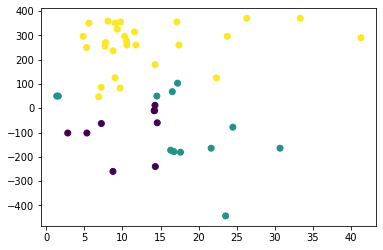

In [12]:
#df = pd.read_csv("df1.csv")
df  = df[df["Kategorie2"]!= "andere"]

dic = {'C_Met/His':1, 'B_-/His':0, '*_His/His':-1}

df["Kat"]=[dic[i]for i in df["Kategorie2"]]

plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])

In [13]:
[i for i in dflg["Kategorie2"]]

['andere',
 'B_-/His',
 'andere',
 '*_His/His',
 '*_His/His',
 'C_Met/His',
 'B_-/His',
 'andere',
 'andere',
 'B_-/His',
 'B_-/His',
 'B_-/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 '*_His/His',
 'B_-/His',
 'andere',
 '*_His/His',
 '*_His/His',
 '*_His/His',
 'andere',
 'C_Met/His',
 'B_-/His',
 'B_-/His',
 'C_Met/His',
 'andere',
 'C_Met/His',
 'C_Met/His',
 'andere',
 'andere',
 'B_-/His',
 'B_-/His',
 'C_Met/His',
 'andere',
 '*_His/His',
 'andere',
 'C_Met/His',
 'C_Met/His',
 'andere',
 'C_Met/His',
 'B_-/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 'C_Met/His',
 'andere',
 'andere',
 'C_Met/His',
 'B_-/His',
 '*_His/His',
 'C_Met/His',
 '*_His/His',
 'andere',
 'andere',
 'C_Met/His',
 'C_Met/His',
 'andere',
 'C_Met/His',
 'C_Met/His',
 'andere',
 'andere',
 'C_Met/His',
 'andere',
 'andere',
 'andere']

# KNN

(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


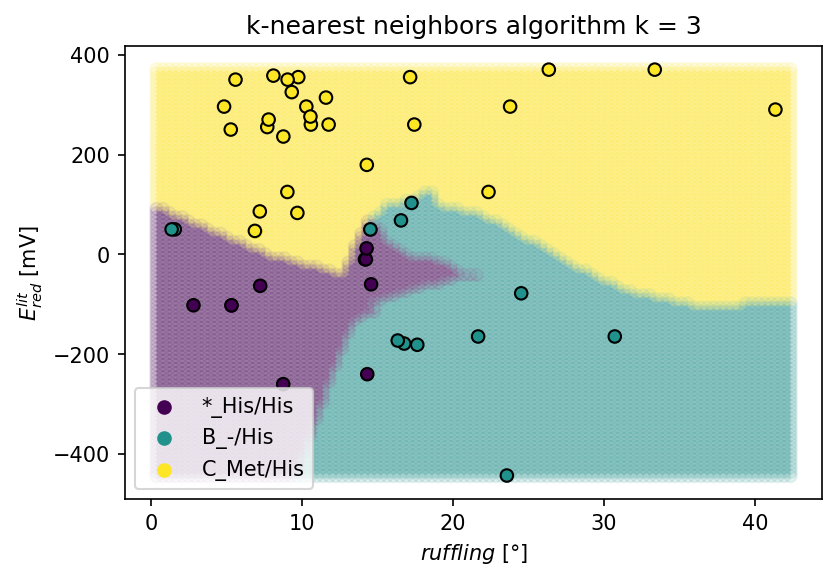

In [14]:
fig  =plt.figure(dpi = 150)
krange = [kn for kn in range(1,20)] 
y = [dic[i]for i in df["Kategorie2"]]

X = df[["ruffling","Em_lit"]]
scaler = StandardScaler()
scaler.fit(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)


X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)
Xs = scaler.transform(X)



model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)

plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"k-nearest neighbors algorithm k = {model.n_neighbors}, ($R^2$ = {np.round(model.score(X_tests,y_test),4)})")
plt.title(f"k-nearest neighbors algorithm k = {model.n_neighbors}")

for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
plt.legend()
fig.savefig(f"{plots}pic_KNN.png")
 #   plt.legend()
  #  plt.show()
   # d.to_csv(f"{plotab}KNN.csv")
    #d    

In [15]:
index1=[]
df1=[]
krange=[i for i in range(1,14)]
for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]],df[["saddling","Em_lit"]],df[["ruffling","saddling"]]]:
  #  index1.append(str(list(X.columns)))
    index1.append(listtostring(list(X.columns)))

    y = df[["Kategorie2"]]
    y = [dic[i]for i in df["Kategorie2"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

    scaler = StandardScaler()
    scaler.fit(X)

    X_trains = scaler.transform(X_train)
    X_tests = scaler.transform(X_test)
    Xs = scaler.transform(X)
    df1.append([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])

    d1 = pd.DataFrame(np.array(df1), index= index1)
d1.columns=krange
d1 = d1.round(4)

#d1.to_csv(f"{plotab}tab_KNN.csv")
d1

,1,2,3,4,5,6,7,8,9,10,11,12,13
$ruf-sad-E$,0.815,0.690,0.690,0.69,0.710,0.695,0.695,0.695,0.695,0.695,0.695,0.655,0.655
$ruf-E$,0.900,0.875,0.880,0.86,0.810,0.690,0.670,0.670,0.670,0.650,0.735,0.715,0.755
$sad-E$,0.765,0.705,0.685,0.66,0.625,0.695,0.675,0.705,0.735,0.690,0.715,0.670,0.650
$ruf-sad$,0.565,0.560,0.625,0.54,0.560,0.500,0.485,0.465,0.465,0.445,0.445,0.430,0.430


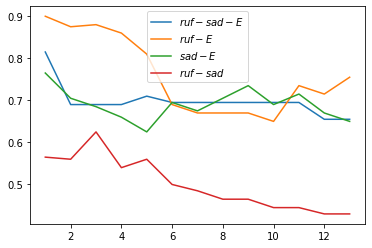

In [16]:
for i in d1.index:
    plt.plot(d1.loc[i],label = i)
plt.legend()
    

In [17]:
d2 = pd.DataFrame()
d2["$k$"] = list(d1.index)
for col in d1.columns:
    d2[col]=list(d1[col])
#d2.to_csv(f"{plotab}tab_KNN.csv",index=False)  

# logistic regression

(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


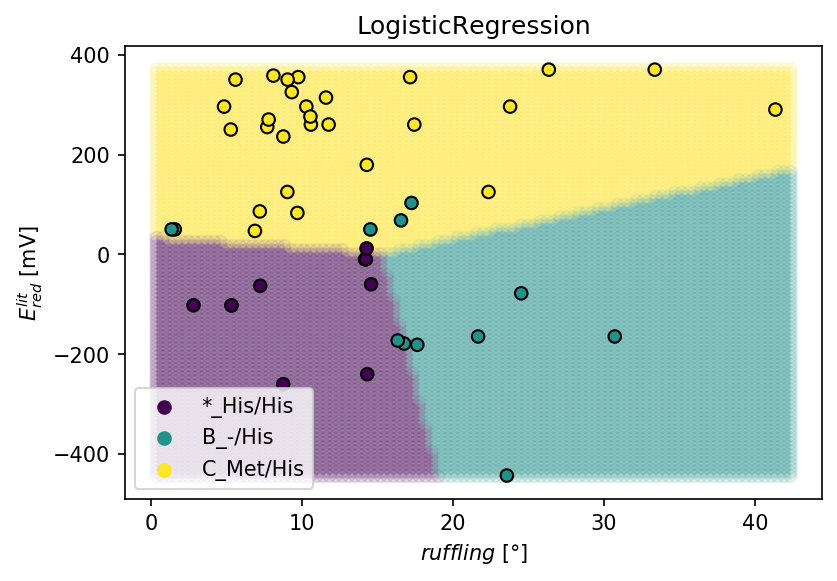

In [18]:
fig  =plt.figure(dpi = 150)

X = df[["ruffling","saddling","Em_lit"]]
X = df[["ruffling","Em_lit"]]

krange = [kn for kn in range(1,20)]
krange = [1]
df1 = []

y = df[["Kategorie2"]]
y = [dic[i]for i in df["Kategorie2"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(X)

X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)
Xs = scaler.transform(X)

model = LogisticRegression()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)
#plt.scatter(*p2(X)[:2],c =pred2,alpha=0.1)

#plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"LogisticRegression ($R^2$ = {np.round(model.score(X_test,y_test),4)})")
plt.title(f"LogisticRegression")

for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)

#plt.savefig(f"{plots}LogisticRegression.png")
plt.legend()
plt.show()
fig.savefig(f"{plots}LogisticRegression.png")

  

# Random Forest

(0.267004, 0.004874, 0.329415, 1.0) 0
(0.127568, 0.566949, 0.550556, 1.0) 1
(0.993248, 0.906157, 0.143936, 1.0) 2


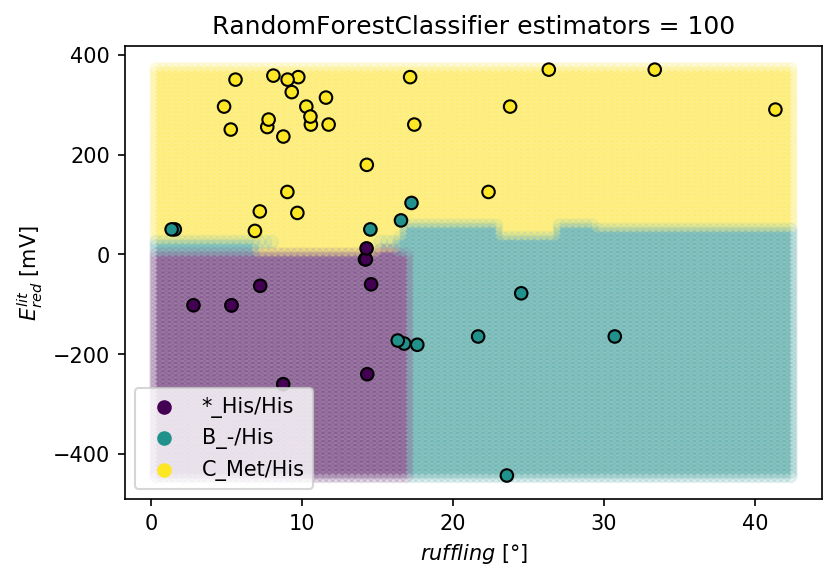

In [19]:
fig  =plt.figure(dpi = 150)
krange = [kn for kn in range(1,20)] 
y = [dic[i]for i in df["Kategorie2"]]

X = df[["ruffling","Em_lit"]]
scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)


X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)
Xs = scaler.transform(X)



model = RandomForestClassifier()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)

plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"RandomForestClassifier estimators = {model.n_estimators}, ($R^2$ = {np.round(model.score(X_tests,y_test),4)})")
plt.title(f"RandomForestClassifier estimators = {model.n_estimators}")
for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
plt.legend()

fig.savefig(f"{plots}pic_RandomForest.png")
 #   plt.legend()
  #  plt.show()
   # d.to_csv(f"{plotab}KNN.csv")
    #d    

In [20]:
if(False):
    index1=[]
    df1=[]
    krange=[i for i in range(10,100,10)]
    for X in [df[["ruffling","saddling","Em_lit"]], df[["ruffling","Em_lit"]],df[["saddling","Em_lit"]],df[["ruffling","saddling"]]]:
        index1.append(listtostring(list(X.columns)))
        y = df[["Kategorie2"]]
        y = [dic[i]for i in df["Kategorie2"]]

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

        scaler = StandardScaler()
        scaler.fit(X)

        X_trains = scaler.transform(X_train)
        X_tests = scaler.transform(X_test)
        Xs = scaler.transform(X)
        df1.append([np.mean(cross_val_score(RandomForestClassifier(n_estimators = kn), Xs, y, cv = KFold(n_splits = 10))) for kn in krange])
    d1 = pd.DataFrame(np.array(df1), index= index1)
    d1.columns=krange
    d1 = d1.round(4)
    #d1.to_csv(f"{plotab}tab_RandomForest.csv")

    d2 = pd.DataFrame()
    d2["$esitmor$"] = list(d1.index)
    for col in d1.columns:
        d2[col]=list(d1[col])
    #d2.to_csv(f"{plotab}tab_RandomForest.csv",index=False)   

In [21]:
d2

,$k$,1,2,3,4,5,6,7,8,9,10,11,12,13
0,$ruf-sad-E$,0.815,0.690,0.690,0.69,0.710,0.695,0.695,0.695,0.695,0.695,0.695,0.655,0.655
1,$ruf-E$,0.900,0.875,0.880,0.86,0.810,0.690,0.670,0.670,0.670,0.650,0.735,0.715,0.755
2,$sad-E$,0.765,0.705,0.685,0.66,0.625,0.695,0.675,0.705,0.735,0.690,0.715,0.670,0.650
3,$ruf-sad$,0.565,0.560,0.625,0.54,0.560,0.500,0.485,0.465,0.465,0.445,0.445,0.430,0.430


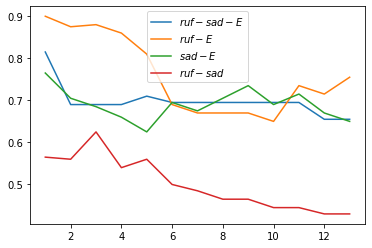

In [22]:
for i in d1.index:
    plt.plot(d1.loc[i],label = i)
plt.legend()
    

In [23]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [24]:
df1

[]

# k-Mean

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/matplotlib/colors.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)
/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

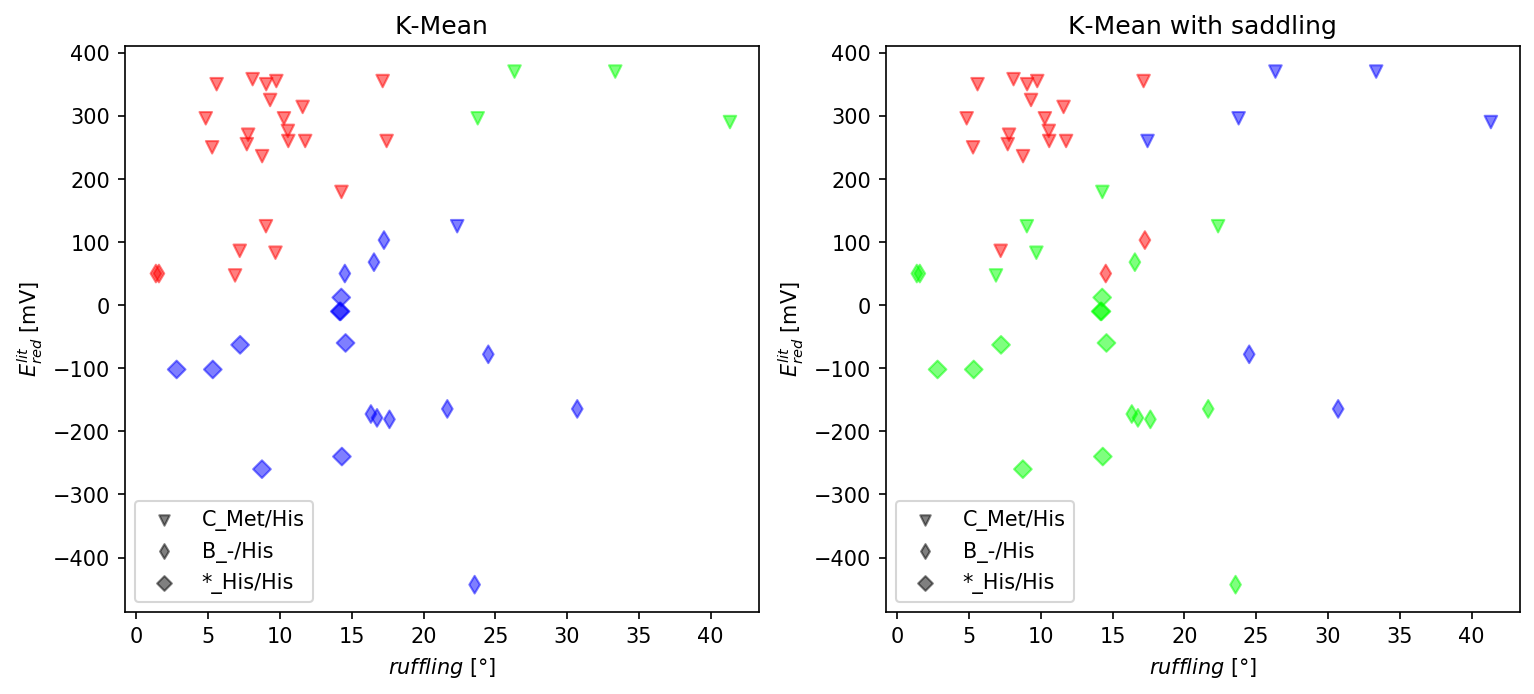

In [25]:
scatterdict = {HH:{"marker" :  "D"},
           BHIS:{"marker" :  "d"},
           CHM:{ "marker" :  "v"},
           "other":{"c":(0,0,0),"marker":"o"}}

cmap = matplotlib.cm.get_cmap('brg')
#plt.sc
rgba = cmap(2)
dic1 = {0:"red",1:"blue",2:"green"}
dic1 = {0:cmap(0),1:"red",2:cmap(255)}


X = df[["ruffling", "Em_lit"]]
X = df[["ruffling", "Em_lit","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
fig = plt.figure(dpi=150,figsize = [12,5])
plt.subplot(122)

#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
#plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
#plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
df2 =df[["ruffling","saddling","Em_lit","Kategorie2"]]
df2["pred"]=model.labels_
model.labels_
for K in df2["Kategorie2"].value_counts().index:
    df3= df2[df2["Kategorie2"]==K]
    #plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg")
    plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg")

plt.title(model.inertia_)
#plt.legend()
plt.ylabel(redox)
plt.xlabel(ruffling)
plt.title(f"K-Mean with saddling")
for K in df2["Kategorie2"].value_counts().index:
    plt.scatter([5],[-400],c="black",s=0.0001,zorder=-666,label=K,**scatterdict[K],alpha=0.5)
plt.legend( markerscale=500, scatterpoints=1, fontsize=10,loc='lower left')
#plt.savefig(f"{plots}Kmean.png")
plt.subplot(121)
plt.ylabel(ruffling)


X = df[["ruffling", "Em_lit"]]
#X = df[["ruffling", "Em_lit","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
#plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
#plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
df2 =df[["ruffling","saddling","Em_lit","Kategorie2"]]
df2["pred"]=model.labels_
model.labels_
for K in df2["Kategorie2"].value_counts().index:
    df3= df2[df2["Kategorie2"]==K]
#    plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg",label=K)
    plt.scatter(df3["ruffling"],df3["Em_lit"], c = [dic1[i] for i in df3["pred"]], alpha = 0.5,**scatterdict[K],cmap="brg")
plt.title(model.inertia_)
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"K-Mean")
#plt.legend()
for K in df2["Kategorie2"].value_counts().index:
    plt.scatter([5],[-400],c="black",s=0.0001,zorder=-666,label=K,**scatterdict[K],alpha=0.5)
plt.legend( markerscale=500, scatterpoints=1, fontsize=10,loc='lower left')
fig.savefig(f"{plots}K_mean2.png")

plt.show()


In [26]:
model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1], dtype=int32)

In [27]:

for K in df2["Kategorie2"].value_counts().index:

    print()

In [28]:
d1

,1,2,3,4,5,6,7,8,9,10,11,12,13
$ruf-sad-E$,0.815,0.690,0.690,0.69,0.710,0.695,0.695,0.695,0.695,0.695,0.695,0.655,0.655
$ruf-E$,0.900,0.875,0.880,0.86,0.810,0.690,0.670,0.670,0.670,0.650,0.735,0.715,0.755
$sad-E$,0.765,0.705,0.685,0.66,0.625,0.695,0.675,0.705,0.735,0.690,0.715,0.670,0.650
$ruf-sad$,0.565,0.560,0.625,0.54,0.560,0.500,0.485,0.465,0.465,0.445,0.445,0.430,0.430


In [29]:

d2 = pd.DataFrame()
d2["nesitmor"] = list(d1.index)
for col in d1.columns:
    d2[col]=list(d1[col])
d2.to_csv(f"{plotab}test.csv",index=False)    

In [30]:
d1[col]

$ruf-sad-E$    0.655
$ruf-E$        0.755
$sad-E$        0.650
$ruf-sad$      0.430
Name: 13, dtype: float64

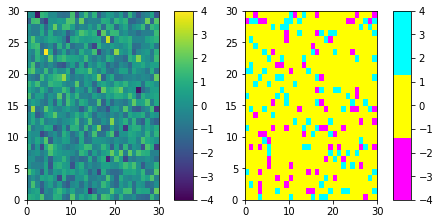

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([256/256, 0/256, 256/256, 1])
cyan = np.array([0/256, 256/256, 256/256, 1])
yellow = np.array([256/256, 256/256, 0/256, 1])


newcolors[:85, :] = pink
newcolors[85:170, :] = yellow
newcolors[170:, :] = cyan
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        print(cmap)
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

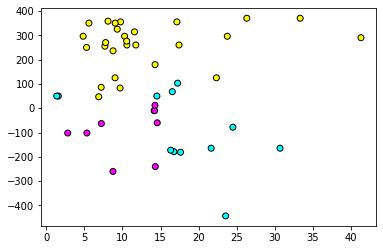

In [32]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([256/256, 0/256, 256/256, 1])
cyan = np.array([0/256, 256/256, 256/256, 1])
yellow = np.array([256/256, 256/256, 0/256, 1])


newcolors[:85, :] = pink
newcolors[85:170, :] = cyan
newcolors[170:, :] = yellow
newcmp = ListedColormap(newcolors)

plt.scatter(df["ruffling"],df["Em_lit"],c=df["Kat"],cmap=newcmp,edgecolor="black")

(1.0, 0.0, 1.0, 1.0) 0
(0.0, 1.0, 1.0, 1.0) 1
(1.0, 1.0, 0.0, 1.0) 2


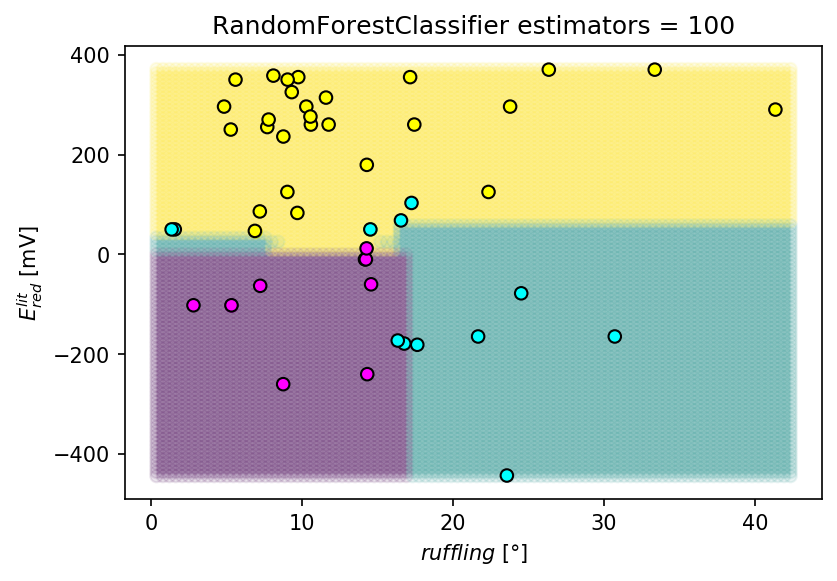

In [33]:
fig  =plt.figure(dpi = 150)
krange = [kn for kn in range(1,20)] 
y = [dic[i]for i in df["Kategorie2"]]

X = df[["ruffling","Em_lit"]]
scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)


X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)
Xs = scaler.transform(X)



model = RandomForestClassifier()
model.fit(X_trains, y_train)
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

xx,yy =p2(X)[:2]
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)#,cmap=cmap)

plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black",cmap=newcmp)
plt.xlabel(ruffling)
plt.ylabel(redox)
plt.title(f"RandomForestClassifier estimators = {model.n_estimators}, ($R^2$ = {np.round(model.score(X_tests,y_test),4)})")
plt.title(f"RandomForestClassifier estimators = {model.n_estimators}")
for a,h in zip(range(0,3),[HH,BHIS,CHM]):
    dfc = df[df["Kategorie2"]==h]
    cmap = matplotlib.cm.get_cmap('viridis')
    cmap=newcmp
    #plt.sc
    rgba = cmap(0.5*a)
    print(rgba,a)
    #plt.scatter([2],[a],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)
    plt.scatter(dfc.iloc[0][["ruffling"]],dfc.iloc[0][["Em_lit"]],c=[rgba],label=[HH,BHIS,CHM][a],alpha=1,vmax=40,zorder=-40)

#fig.savefig(f"{plots}pic_RandomForest.png")
 #   plt.legend()
  #  plt.show()
   # d.to_csv(f"{plotab}KNN.csv")
    #d    

In [34]:
256/3

85.33333333333333